# **Bike Sharing Demand**


***


## <font color = 'gold'>1 Ask</font>

### 1) Problem Definition

Predict the total count of bikes rented during each hour covered by the test set.

### 2) Background

1. Kaggle Competition: https://www.kaggle.com/competitions/bike-sharing-demand/overview
2. You are provided hourly rental data spanning for two years. For this competition, the training set is comprised of the first 19 days of each month. The test set is the 20th to the end of the month.</br> You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

## <font color = 'gold'>2 Prepare</font>

### 1. Tools

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from datetime import datetime
import missingno as msno
#import pandas_profiling
#from pandas_profiling import ProfileReport
import random

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import folium
from folium import plugins
warnings.filterwarnings('ignore')
#from autoviz.AutoViz_Class import AutoViz_Class
from matplotlib import rcParams
from scipy import stats
%matplotlib inline

# machine learning
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification


# matplot/seaborn 한글 폰트
#plt.rcParams['font.family'] = 'Noto Sans CJK KR'
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(16,8))


<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

### 2. Acquire data 

<details><summary>Data fields</summary>

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

</details>


In [2]:
# windows
train = pd.read_csv('C:/Users/persi/Desktop/서웅/DataScience/Test/Projects/Actual/[Project 3] Bike Sharing Demand/Data/bike-sharing-demand/train.csv')
test = pd.read_csv('C:/Users/persi/Desktop/서웅/DataScience/Test/Projects/Actual/[Project 3] Bike Sharing Demand/Data/bike-sharing-demand/test.csv')
sub = pd.read_csv('C:/Users/persi/Desktop/서웅/DataScience/Test/Projects/Actual/[Project 3] Bike Sharing Demand/Data/bike-sharing-demand/sampleSubmission.csv')

In [3]:
# mac
#train = pd.read_csv('/Users/seowoongchu/Desktop/DATA SCIENCE/Test-1/Projects/Actual/[Project 3] Bike Sharing Demand/Data/bike-sharing-demand/train.csv')
#test = pd.read_csv('/Users/seowoongchu/Desktop/DATA SCIENCE/Test-1/Projects/Actual/[Project 3] Bike Sharing Demand/Data/bike-sharing-demand/test.csv')
#sub = pd.read_csv('/Users/seowoongchu/Desktop/DATA SCIENCE/Test-1/Projects/Actual/[Project 3] Bike Sharing Demand/Data/bike-sharing-demand/sampleSubmission.csv')

## <font color = 'gold'>3 Process</font>

### 1. Get to know the data

#### 1) Basics

In [4]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [6]:
sub

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [7]:
train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [9]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

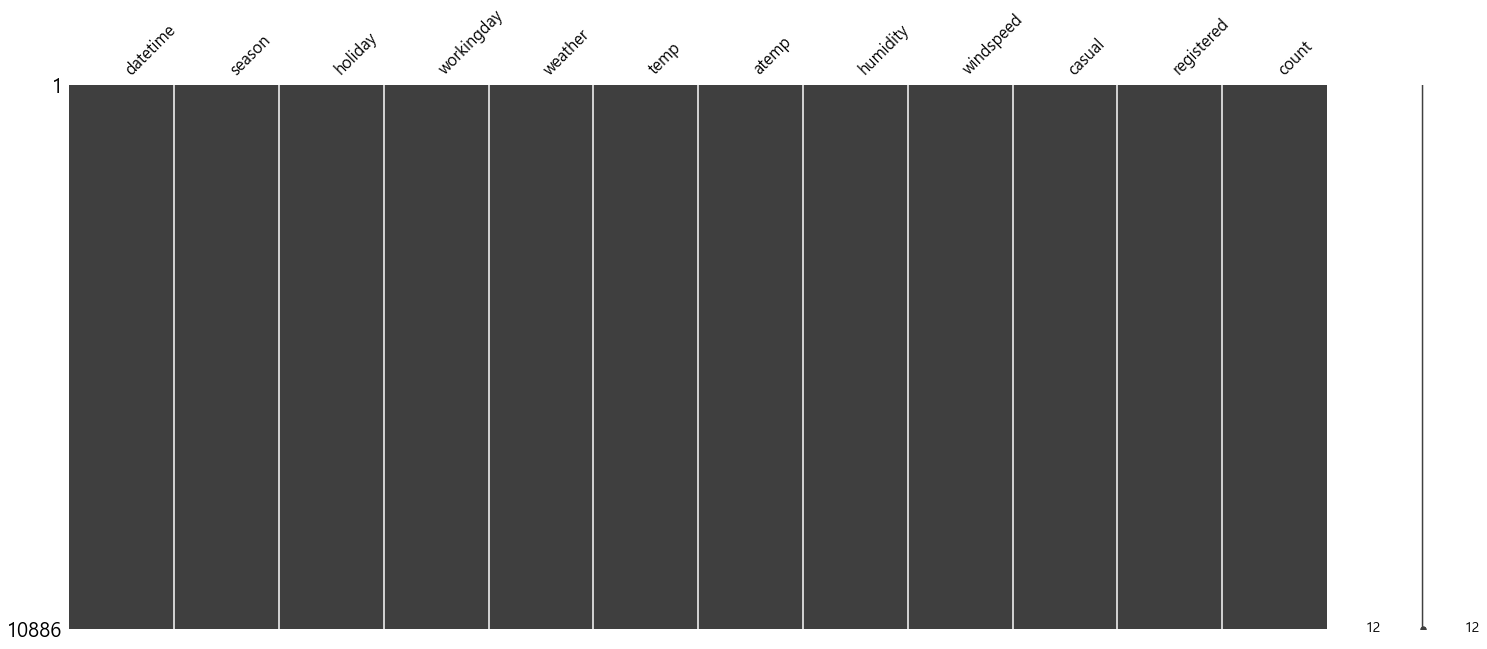

In [10]:
msno.matrix(train)

Yay! There doesn't seem to be any missing data!

In [11]:
for col in train:
    print(col, train[col].unique())

datetime ['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
season [1 2 3 4]
holiday [0 1]
workingday [0 1]
weather [1 2 3 4]
temp [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
atemp [14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]
humidity [ 81  80  75  86  76  77  72  82  88  87 

##### Observation

1. Seems like we can get more features out of the datetime feature.
2. Apart from season, holiday, workingday, weather, the rest of the features seem to be continuous.

##### Dependent(Target) Variable Observation

1. [count] is the addition of [casual] and [registered]

#### 2) Clean up data (Feature Engineering Part 1)

##### 1. Feature Engineering

Lets extract year, month, day, hour and day_name from the datetime feature. This will help us build a more accurate model. But first, lets convert it from object to datetime.

In [12]:
train.datetime = pd.to_datetime(train.datetime)
test.datetime = pd.to_datetime(test.datetime)

In [13]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.day_name()


test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.day_name()

Lets change the days in a week into numerical values for modeling purposes in the future. Monday is 1.

In [14]:
days = train.dayofweek.unique().tolist()
train = train.replace(days,[6,7,1,2,3,4,5])
test = test.replace(days,[6,7,1,2,3,4,5])

Let's rearrange the order of the columns for the sake of being neat.

In [15]:
train = train.rename(columns = {'day':'date', 'dayofweek':'day', 'workingday':'workday'})
train = train[['datetime','year','month','date','day','hour','holiday','workday','season','weather','temp','atemp','humidity','windspeed','casual','registered','count']]
test = test.rename(columns = {'day':'date', 'dayofweek':'day', 'workingday':'workday'})
test = test[['datetime', 'year','month','date','day','hour','holiday','workday','season','weather','temp','atemp','humidity','windspeed']]
train

,datetime,year,month,date,day,hour,holiday,workday,season,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011,1,1,6,0,0,0,1,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,2011,1,1,6,1,0,0,1,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,2011,1,1,6,2,0,0,1,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,2011,1,1,6,3,0,0,1,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,2011,1,1,6,4,0,0,1,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,3,19,0,1,4,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,2012,12,19,3,20,0,1,4,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,2012,12,19,3,21,0,1,4,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,2012,12,19,3,22,0,1,4,1,13.94,17.425,61,6.0032,12,117,129


## <font color = 'gold'>4 Analyze (EDA)</font>

For analysis, lets use a dataframe without the 'datetime' feature.

In [16]:
tra = train.drop(['datetime'], axis=1)
te = test.drop(['datetime'], axis=1)

### 1. Univariate Analysis

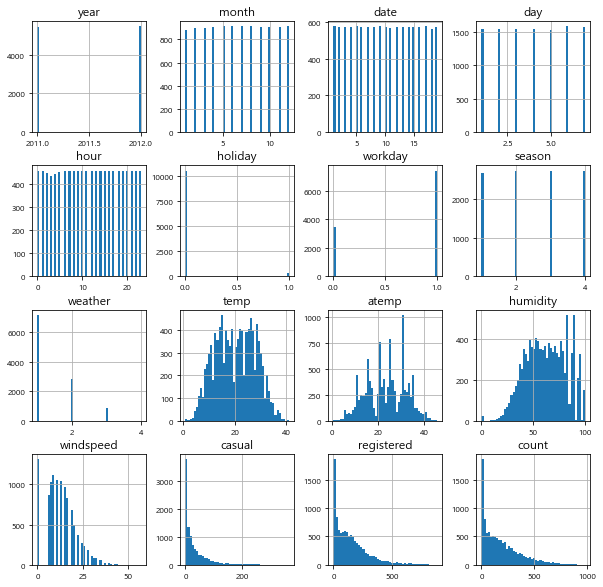

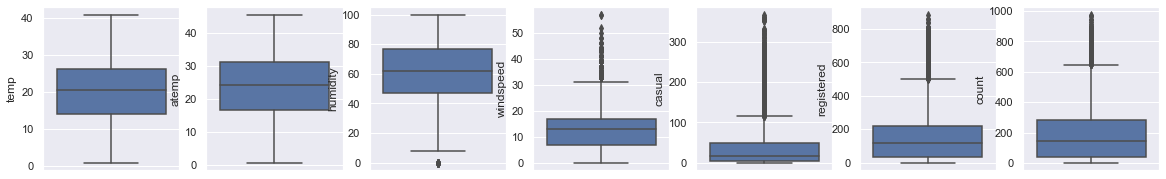

In [17]:
tra.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8);
sns.set(font_scale=1)

plt.figure(figsize=(20,3))
# list of continuous data
cd=['temp','atemp','humidity','windspeed','casual','registered','count']
i=0
for name in cd:
    i=i+1
    plt.subplot(1,7,i)
    sns.boxplot(y=name,data=tra)    
plt.show()

- weather diminishes as it gets bigger.
- temp, atemp, humidity are normaly distributed.
- windspeed is strange looking with a gap between 0 and the rest of the values. Also it has quite an amount of outliers. Lets investigate further later.
- casual seems to be skeewed towards the right the most followed by registered and count with several outliers.

### 2. Bivariate Analysis

Lets make a bivariate analysis of all the features. I expect 'date' to have no significance in the analysis but let's try just for the sake of science!

<Figure size 720x576 with 0 Axes>

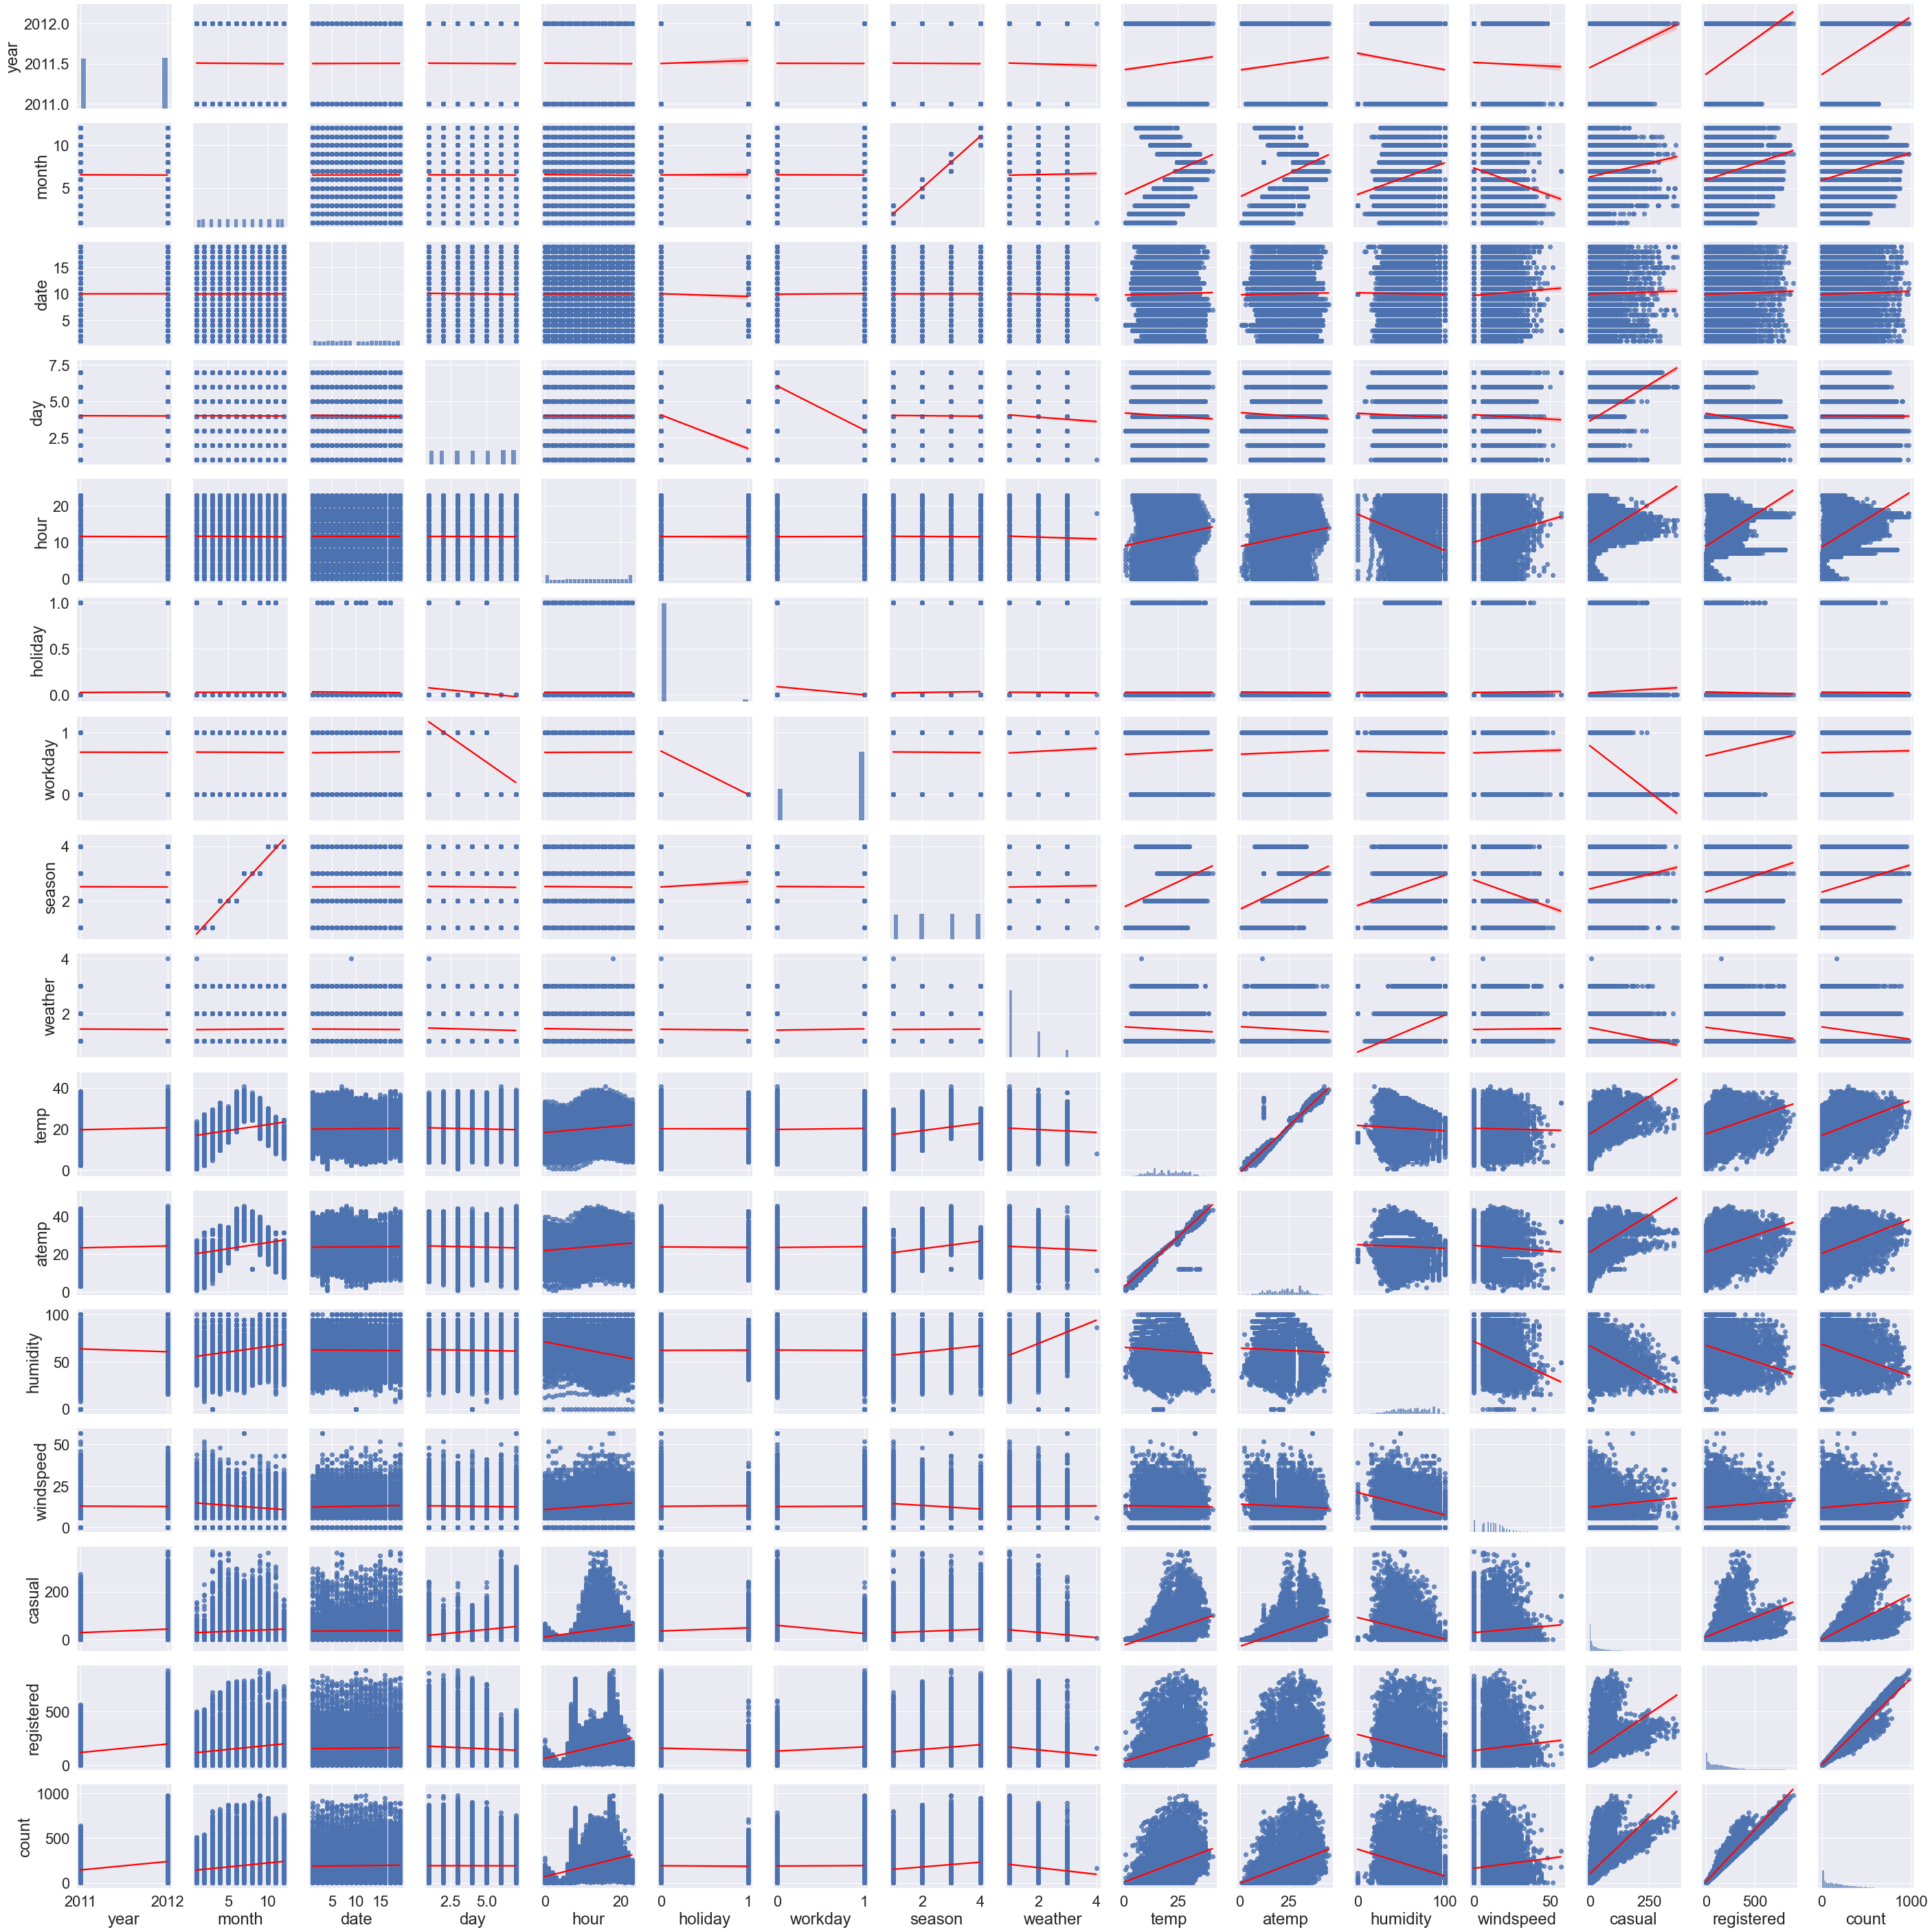

In [18]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.pairplot(tra, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

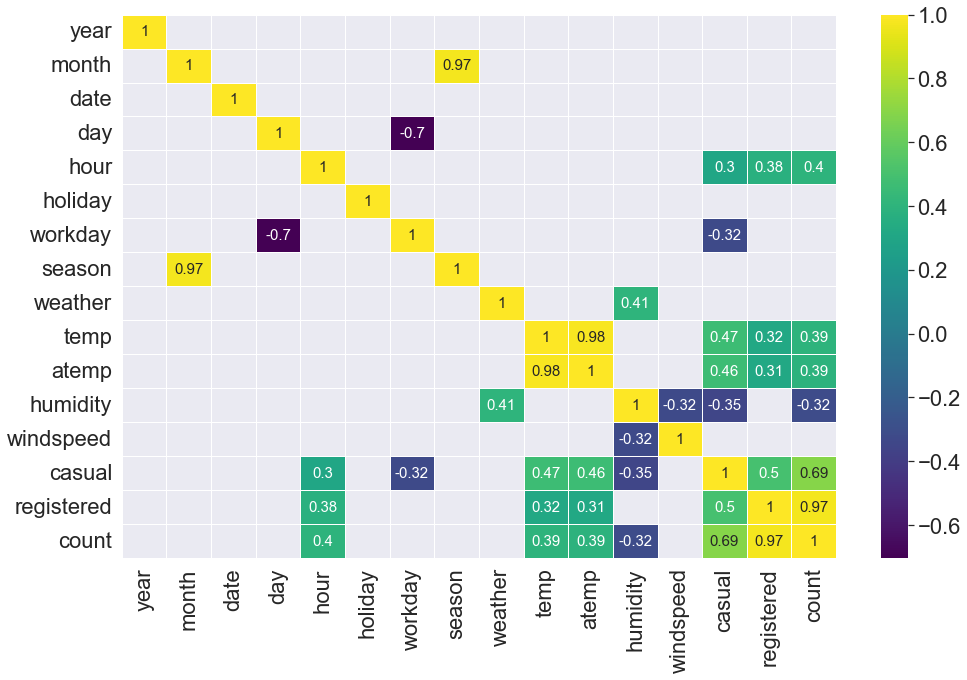

In [19]:
plt.figure(figsize=(16,10))
corr = tra.corr()
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], annot=True, annot_kws={"size": 15}, linewidths = 0.5, cmap='viridis')
sns.set(font_scale=1)
plt.show()

- This heatmap shows correlations that are above 0.4 in absolute value. Hour, temp, atemp, humidity, casual and registered seem to have a strong correlation with count.</br>
- Atemp and temp are very similar while having strong correlation. Therefore only one has to be used to avoid multi-collinearity. We will use temp.
- Registered and casual are highly correlated with count. However it cannot be used for modeling as it doesn't exist in the test data. In other words, it will cause data leakage.
- Yes. Date does not show any relevance or correlation in this study. DELETE!
- Casual is more correlated with other featurese than registered.

Below is the total count per distinct data.

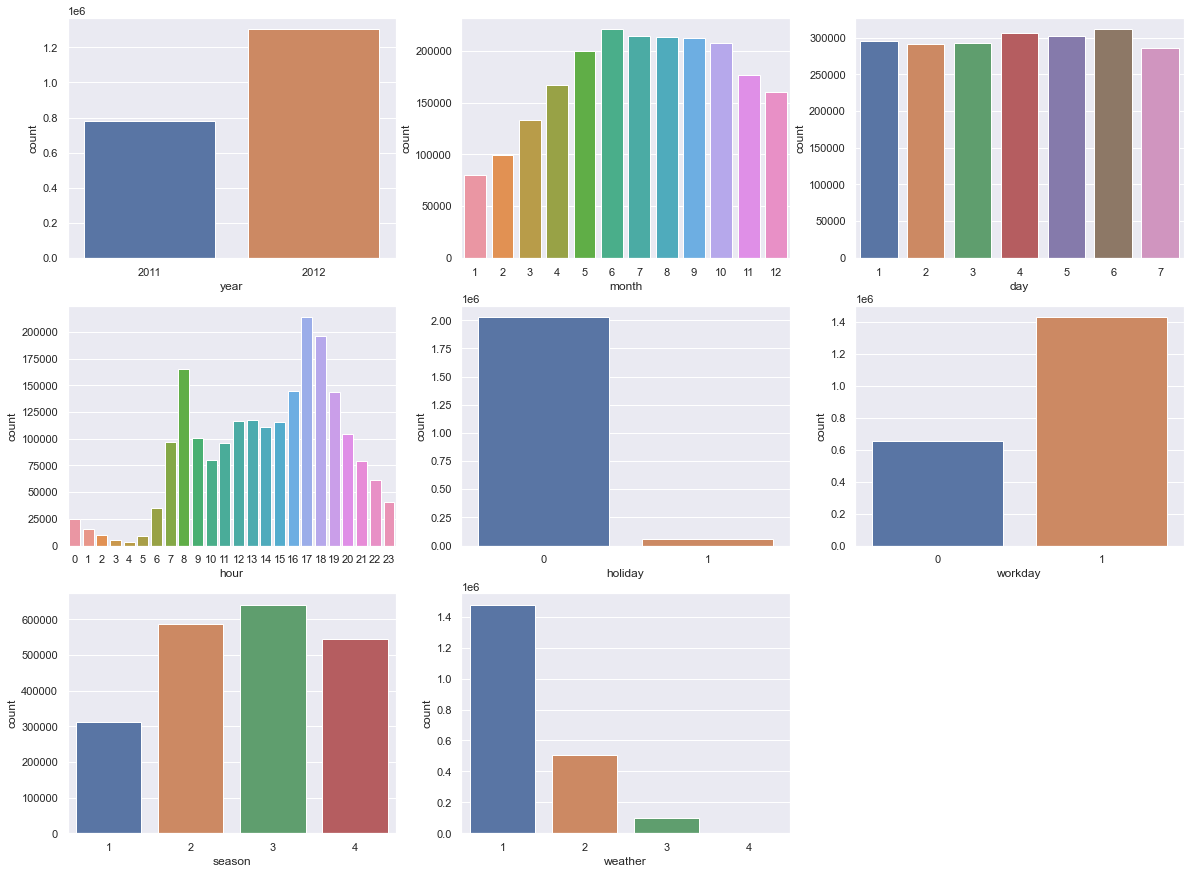

<AxesSubplot:xlabel='hour', ylabel='count'>

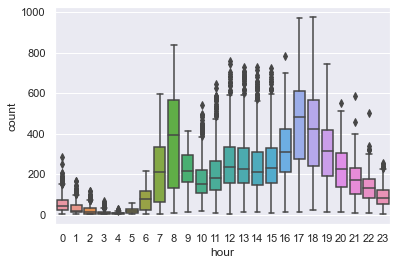

In [20]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1)

# list of distinct data
dd=['year','month','day','hour','holiday','workday','season', 'weather']
i=0
for name in dd:
    i=i+1
    t2 = tra[[name, 'count']].groupby(name).sum().reset_index()
    plt.subplot(3,3,i)
    sns.barplot(x=name, y='count',data=t2)
plt.show()

sns.boxplot(x='hour', y='count',data=tra)

- We can deduct several conclusions from these plots but we will not go too deep to focus more on modeling.

### 3. Multivariable Analysis

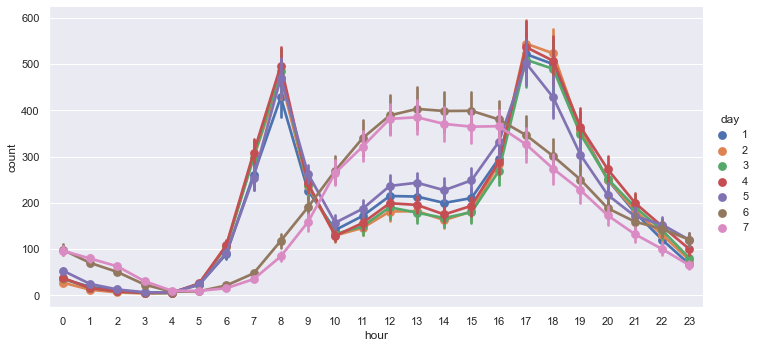

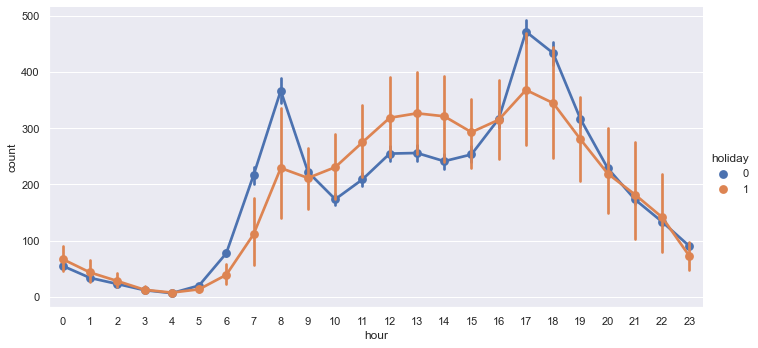

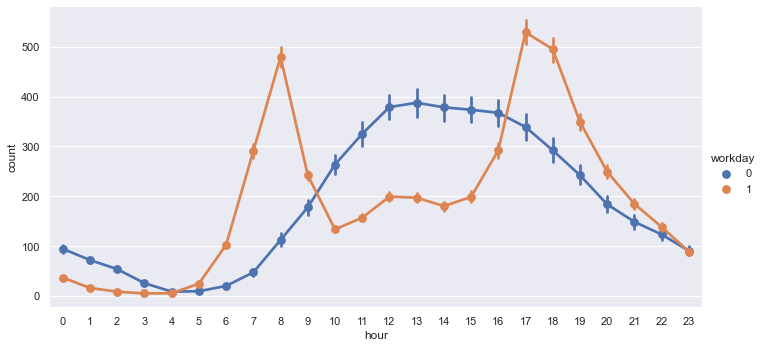

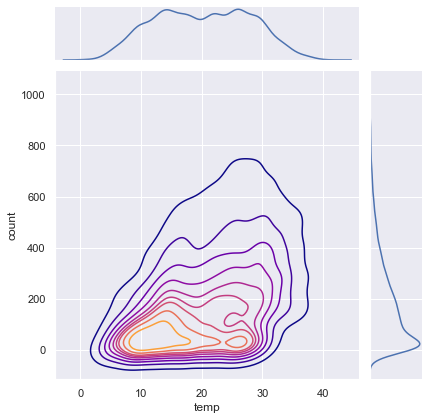

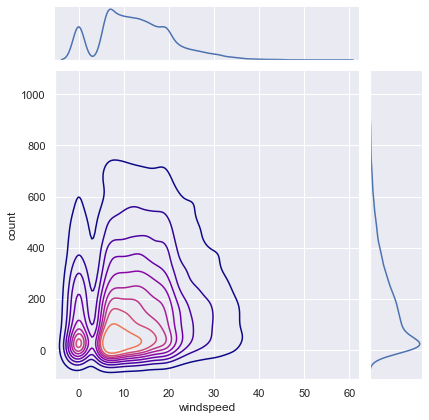

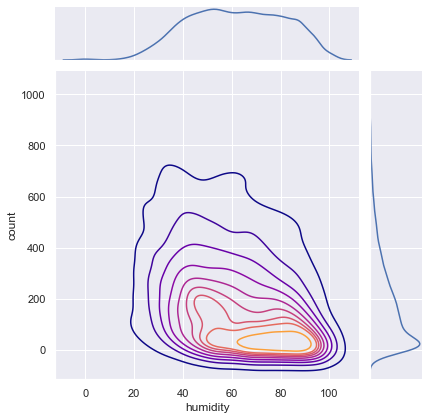

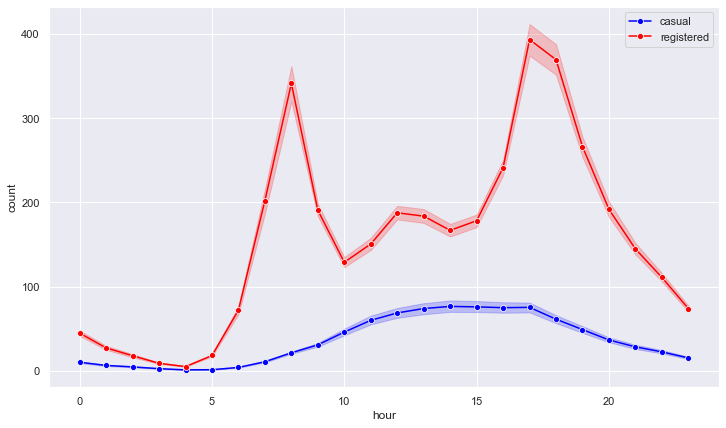

In [21]:
sns.set(rc={"figure.figsize":(12, 7)}) 
sns.factorplot(x='hour', y='count', hue='day', data=tra, size=5, aspect=2)
sns.factorplot(x='hour', y='count', hue='holiday',  data=tra, size=5, aspect=2)
sns.factorplot(x='hour', y='count', hue='workday', data=tra, size=5, aspect=2)
sns.jointplot(x='temp', y='count', data = tra, kind = 'kde', cmap = 'plasma')
sns.jointplot(x='windspeed', y='count', data = tra, kind = 'kde', cmap = 'plasma')
sns.jointplot(x='humidity', y='count', data = tra, kind = 'kde', cmap = 'plasma')
plt.show()

fig, ax = plt.subplots(figsize = (12,7))
sns.lineplot(x = 'hour', y = 'casual', data = tra, color = 'blue', label='casual', marker='o', ax=ax)
sns.lineplot(x = 'hour', y = 'registered', data = tra, color = 'red', label='registered', marker='o', ax=ax)
plt.ylabel('count')
ax.legend()
plt.show()

- Count definitely seems to be affected by days, workday and holiday.
- Jointplots show that high counts occur when weather conditions are "good". max count for windspeed occur when on most common windspeeds while weather and humidity are not.
- Registered users seem to be using them for commuting purposes while casual users don't seem to follow such conditions.

### 4. Target Variable Analysis

#### 1) Explore

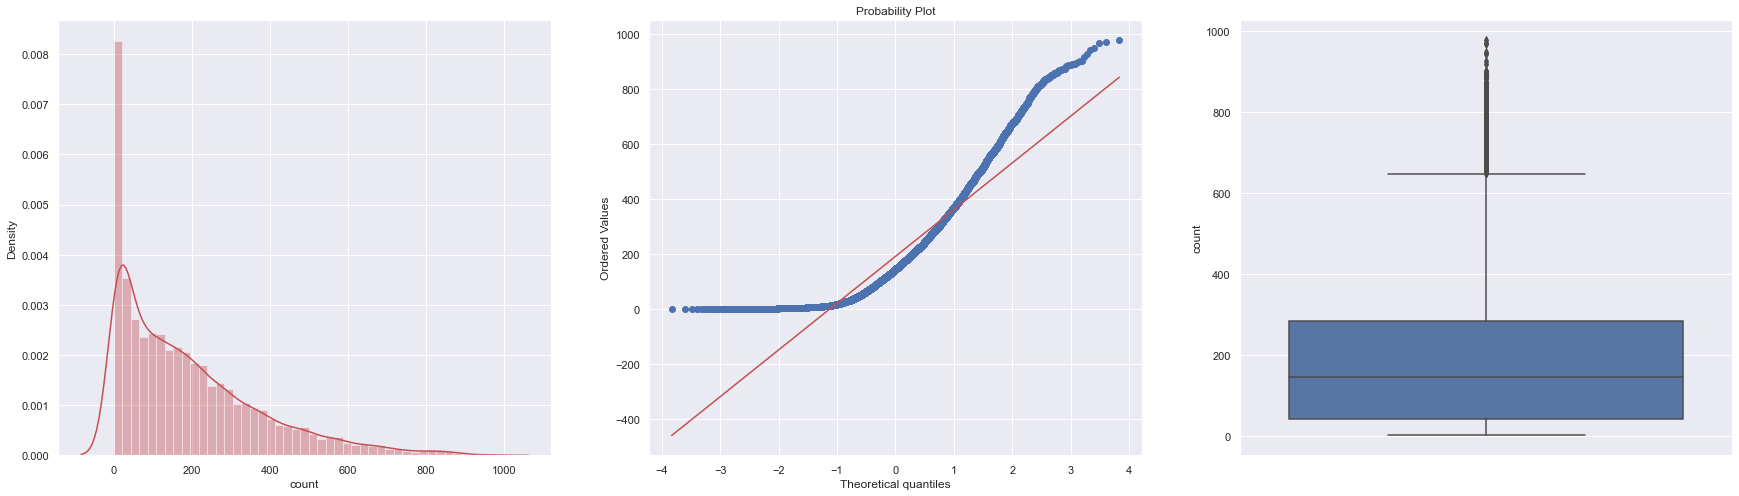

In [22]:
fig,ax = plt.subplots(1,3, figsize=(30,8))
sns.distplot(tra['count'], color='r', hist_kws={'alpha': 0.4}, ax=ax[0])
stats.probplot(tra['count'], plot=ax[1])
sns.boxplot(y = 'count', data = tra)
plt.show()

- The target variable, count, has several outliers.
- It is skewed to the right.
- It is not normally distributed.
- Machine learning techniques require dependent variables to be normal. Lets make them as normal as possible using log transformation later.

#### 2) Removing Outliers

Lets get rid of our outliers in our target variable for better modeling

In [23]:
q1 = train['count'].quantile(0.25)
q3 = train['count'].quantile(0.75)
IQR = q3 - q1
outliers = train[(train['count'] < (q1 - 1.5 * IQR)) | (train['count'] > (q3 + 1.5 * IQR))]
print('percentage of outliars :', "{}%".format(round(len(outliers)/len(train)*100,3)))

percentage of outliars : 2.756%


In [24]:
train = train[~train.index.isin(outliers.index)]
train

,datetime,year,month,date,day,hour,holiday,workday,season,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011,1,1,6,0,0,0,1,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,2011,1,1,6,1,0,0,1,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,2011,1,1,6,2,0,0,1,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,2011,1,1,6,3,0,0,1,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,2011,1,1,6,4,0,0,1,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,3,19,0,1,4,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,2012,12,19,3,20,0,1,4,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,2012,12,19,3,21,0,1,4,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,2012,12,19,3,22,0,1,4,1,13.94,17.425,61,6.0032,12,117,129


## <font color = 'gold'>5 Modeling</font>

### 1. Feature Engineering for Machine Learning

Combine train and test data. Drop 'date', 'casual', 'registered' as it is not needed for modeling. 'Count' is needed to separate train and test datasets again.

In [25]:
data = train.append(test).reset_index(drop=True).drop(['date','casual','registered'], axis=1)
data


,datetime,year,month,day,hour,holiday,workday,season,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,2011,1,6,0,0,0,1,1,9.84,14.395,81,0.0000,16.0
1,2011-01-01 01:00:00,2011,1,6,1,0,0,1,1,9.02,13.635,80,0.0000,40.0
2,2011-01-01 02:00:00,2011,1,6,2,0,0,1,1,9.02,13.635,80,0.0000,32.0
3,2011-01-01 03:00:00,2011,1,6,3,0,0,1,1,9.84,14.395,75,0.0000,13.0
4,2011-01-01 04:00:00,2011,1,6,4,0,0,1,1,9.84,14.395,75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17074,2012-12-31 19:00:00,2012,12,1,19,0,1,1,2,10.66,12.880,60,11.0014,NaN
17075,2012-12-31 20:00:00,2012,12,1,20,0,1,1,2,10.66,12.880,60,11.0014,NaN
17076,2012-12-31 21:00:00,2012,12,1,21,0,1,1,1,10.66,12.880,60,11.0014,NaN
17077,2012-12-31 22:00:00,2012,12,1,22,0,1,1,1,10.66,13.635,56,8.9981,NaN


Random Forest Model To Predict 0's In Windspeed

In [26]:
from sklearn.ensemble import RandomForestRegressor

w0 = data[data["windspeed"]==0]
not0w = data[data["windspeed"]!=0]
rfw = RandomForestRegressor()
wc = ["season","weather","humidity","month","temp","year","atemp"]
rfw.fit(not0w[wc], not0w["windspeed"])

w0val = rfw.predict(X= w0[wc])
w0["windspeed"] = w0val
data = not0w.append(w0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)
data

,datetime,year,month,day,hour,holiday,workday,season,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 05:00:00,2011,1,6,5,0,0,1,2,9.84,12.880,75,6.003200,1.0
1,2011-01-01 10:00:00,2011,1,6,10,0,0,1,1,15.58,19.695,76,16.997900,36.0
2,2011-01-01 11:00:00,2011,1,6,11,0,0,1,1,14.76,16.665,81,19.001200,56.0
3,2011-01-01 12:00:00,2011,1,6,12,0,0,1,1,17.22,21.210,77,19.001200,84.0
4,2011-01-01 13:00:00,2011,1,6,13,0,0,1,2,18.86,22.725,72,19.999500,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17074,2012-12-29 12:00:00,2012,12,6,12,0,0,1,3,8.20,12.120,100,10.067269,NaN
17075,2012-12-29 13:00:00,2012,12,6,13,0,0,1,3,8.20,12.120,100,10.067269,NaN
17076,2012-12-29 15:00:00,2012,12,6,15,0,0,1,2,9.84,12.120,87,7.451941,NaN
17077,2012-12-29 23:00:00,2012,12,6,23,0,0,1,2,10.66,12.120,60,26.676926,NaN


Lets create dummy variables. Subjects are features that are categorical while not having higher or lower ordinal value. </br>
We are leaving 'weather' as the bigger number represents a more severe weather condition.

In [27]:
#adding dummy varibles to categorical variables
yr_df=pd.get_dummies(data['year'],prefix='y')
month_df=pd.get_dummies(data['month'],prefix='m')
day_df=pd.get_dummies(data['day'],prefix='d')
hour_df=pd.get_dummies(data['hour'],prefix='h')
season_df=pd.get_dummies(data['season'],prefix='s')

Concat dataframes and drop features that have been "dummyfied".

In [28]:
data_list = [data, yr_df, month_df, day_df, hour_df, season_df]
data_con = pd.concat(data_list, axis=1)
df = data_con.drop(['year','month','day','hour','season'], axis=1)
df

,datetime,holiday,workday,weather,temp,atemp,humidity,windspeed,count,y_2011,...,h_18,h_19,h_20,h_21,h_22,h_23,s_1,s_2,s_3,s_4
0,2011-01-01 05:00:00,0,0,2,9.84,12.880,75,6.003200,1.0,1,...,0,0,0,0,0,0,1,0,0,0
1,2011-01-01 10:00:00,0,0,1,15.58,19.695,76,16.997900,36.0,1,...,0,0,0,0,0,0,1,0,0,0
2,2011-01-01 11:00:00,0,0,1,14.76,16.665,81,19.001200,56.0,1,...,0,0,0,0,0,0,1,0,0,0
3,2011-01-01 12:00:00,0,0,1,17.22,21.210,77,19.001200,84.0,1,...,0,0,0,0,0,0,1,0,0,0
4,2011-01-01 13:00:00,0,0,2,18.86,22.725,72,19.999500,94.0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17074,2012-12-29 12:00:00,0,0,3,8.20,12.120,100,10.067269,NaN,0,...,0,0,0,0,0,0,1,0,0,0
17075,2012-12-29 13:00:00,0,0,3,8.20,12.120,100,10.067269,NaN,0,...,0,0,0,0,0,0,1,0,0,0
17076,2012-12-29 15:00:00,0,0,2,9.84,12.120,87,7.451941,NaN,0,...,0,0,0,0,0,0,1,0,0,0
17077,2012-12-29 23:00:00,0,0,2,10.66,12.120,60,26.676926,NaN,0,...,0,0,0,0,0,1,1,0,0,0


dividing train and test and finalizing data frame

In [29]:
dtrain = df[pd.notnull(data['count'])]
dtest = df[~pd.notnull(data['count'])]
dtrain = dtrain.drop('datetime',axis=1)
dtest = dtest.drop('datetime',axis=1)

### 2. Train Model

In [30]:
x_train, x_val, y_train, y_val = train_test_split(dtrain.drop('count',axis=1), dtrain['count'], test_size = 0.25, random_state = 100)

In [31]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_val)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_val)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.5141533724422935,
  1.429141298216367,
  0.5389584198108472,
  1.2999626743372799,
  1.2742406114382516]}

### 3. Evaluate Model Performance

In [32]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.514153
1,AdaBoostRegressor,1.429141
2,BaggingRegressor,0.538958
3,SVR,1.299963
4,KNeighborsRegressor,1.274241


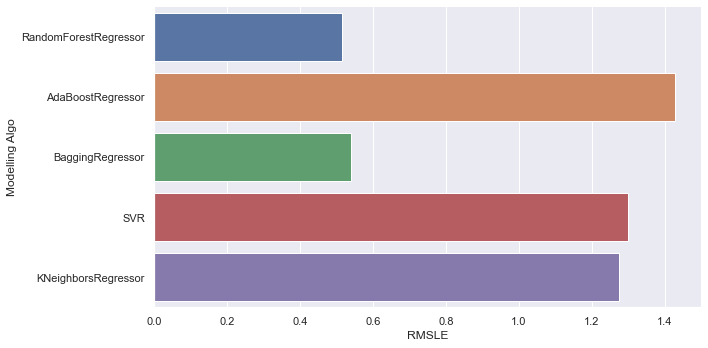

In [33]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

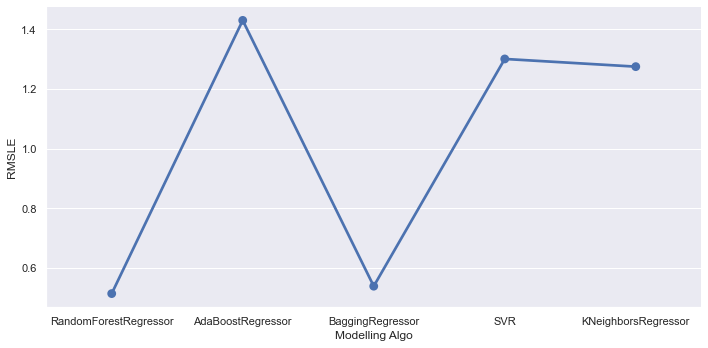

In [34]:
sns.factorplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)

In [35]:
#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_val)
print((np.sqrt(mean_squared_log_error(pred,y_val))))

0.5160411297573635


In [36]:
clf_rf.best_params_


{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

In [37]:
# for KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_val)
print((np.sqrt(mean_squared_log_error(pred,y_val))))

1.2742406114382516


In [38]:
clf_knn.best_params_


{'n_jobs': -1, 'n_neighbors': 5}

In [39]:
dtest.drop('count',axis=1,inplace=True)

In [40]:
pred=clf_rf.predict(dtest)
d={'datetime':test['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.to_csv('answer.csv',index=False) # saving to a csv file for predictions on kaggle.

### 4. Submit

In [41]:
ans

,datetime,count
0,2011-01-20 00:00:00,15.292
1,2011-01-20 01:00:00,5.370
2,2011-01-20 02:00:00,3.778
3,2011-01-20 03:00:00,6.650
4,2011-01-20 04:00:00,38.080
...,...,...
6488,2012-12-31 19:00:00,120.974
6489,2012-12-31 20:00:00,171.468
6490,2012-12-31 21:00:00,98.824
6491,2012-12-31 22:00:00,71.388
